In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import encodings_solution_1, encodings_solution_2

In this notebook, you'll be working with the Pokémon dataset from the univariate plots lesson.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

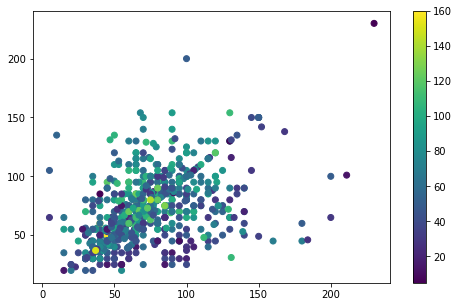

In [3]:
# YOUR CODE HERE
plt.figure(figsize = [8,5])
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense', c = 'speed')
plt.colorbar();

When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.


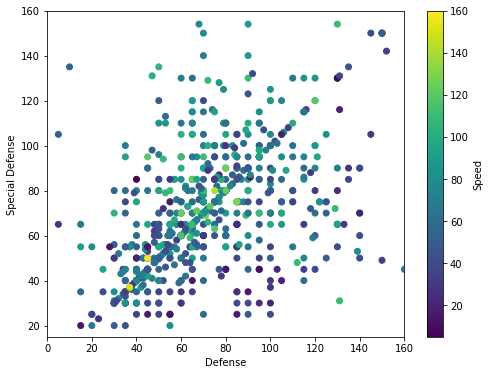

In [4]:
# run this cell to check your work against ours
encodings_solution_1()

Text(0,0.5,'Special Defense')

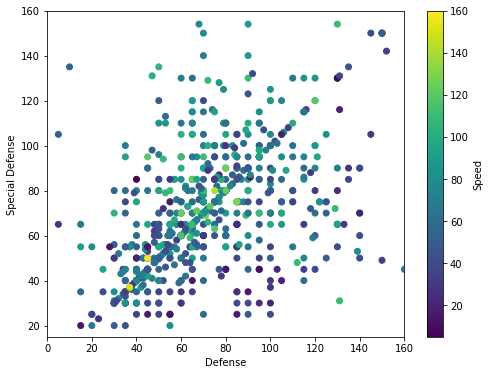

In [5]:
plt.figure(figsize = [8,6])
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense',
            c = 'speed')
plt.colorbar(label = 'Speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense')

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [6]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [7]:
# YOUR CODE HERE
pokemon_sub = pkmn_types[pkmn_types.type.isin(["fairy","dragon"])]
pokemon_sub

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon
172,25,44,28,2,0.3,50,173,45,55,cleffa,15,3.0,type_1,fairy
174,20,49,65,2,0.3,35,175,40,65,togepi,20,1.5,type_1,fairy
175,40,142,85,2,0.6,55,176,80,105,togetic,40,3.2,type_1,fairy
208,80,60,50,2,0.6,60,209,40,40,snubbull,30,7.8,type_1,fairy
209,120,158,75,2,1.4,90,210,60,60,granbull,45,48.7,type_1,fairy


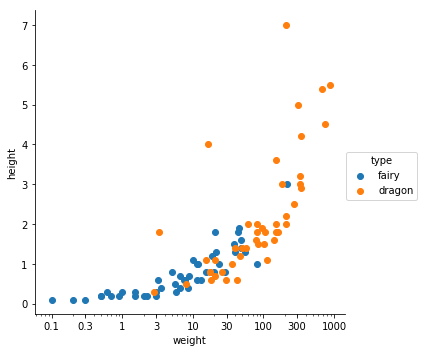

In [10]:
# plot
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, "weight", 'height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()

After subsetting the data, I used FacetGrid to set up and generate the plot. I used the .set() method for FacetGrid objects to set the x-scaling and tick marks. The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.


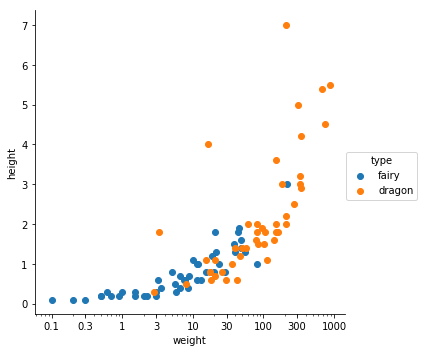

In [11]:
# run this cell to check your work against ours
encodings_solution_2()